In [1]:
pip install tensorflow-probability==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s e

In [4]:
import gradio as gr

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
parkinsons_data = pd.read_csv('/content/drive/MyDrive/Copy of Parkinssondisease.csv')

In [8]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
model = svm.SVC(kernel='linear')

In [15]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [16]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [17]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [18]:
print("TRAINING ACCURACY=",training_data_accuracy*100)
print("TESTING ACCURACY=",test_data_accuracy*100)

TRAINING ACCURACY= 88.46153846153845
TESTING ACCURACY= 87.17948717948718


In [19]:
import gradio as gr
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample input data for demonstration purposes
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168,
              0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689,
              0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551,
              1.743867, 0.085569)

# Assuming you have already defined and loaded your model and scaler
# model = load_model_somehow()
# scaler = load_scaler_somehow()

def predict_parkinsons(*input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    std_data = scaler.transform(input_data_reshaped)
    prediction = model.predict(std_data)

    if prediction == 0:
        return "The Person does not have Parkinson's Disease"
    else:
        return "The Person has Parkinson's"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_parkinsons,
    inputs=[gr.Number(label=f"Feature {i+1}") for i in range(len(input_data))],
    outputs="text",
    live=True,
    examples=[
        list(input_data),
        # Add more examples as needed
    ]
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ae3e6541d900c97485.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


LogisticRegression : 
Training Accuracy :  0.9275862068965517
Testing Accuracy :  0.8266129032258064
XGBClassifier : 
Training Accuracy :  0.7924568965517241
Testing Accuracy :  0.7076612903225806
SVC : 
Training Accuracy :  0.3754310344827586
Testing Accuracy :  0.32661290322580644


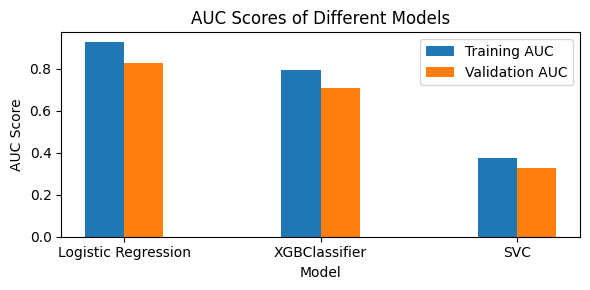

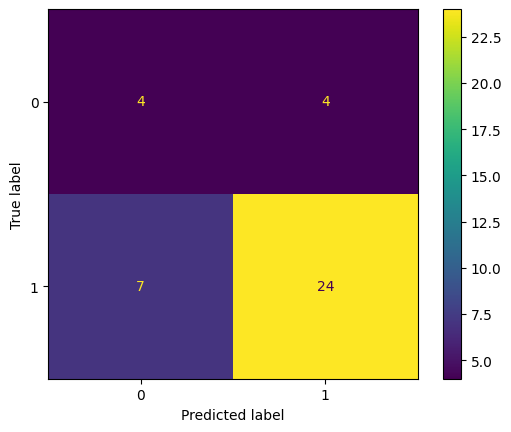

In [20]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import confusion_matrix # Import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib

# Assuming X, Y, X_val, and Y_val are already defined
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
model_names = ['Logistic Regression', 'XGBClassifier', 'SVC'] # Define model names
train_scores = []
val_scores = []

for model in models:
    model.fit(X, Y)
    print(f'{model.__class__.__name__} : ')

    train_preds = model.predict_proba(X_train)[:, 1]
    train_score = ras(Y_train, train_preds) # Calculate AUC score for training set
    train_scores.append(train_score)
    print('Training Accuracy : ', train_score)

    val_preds = model.predict_proba(X_test)[:, 1]
    val_score = ras(Y_test, val_preds) # Calculate AUC score for validation set
    val_scores.append(val_score)
    print('Testing Accuracy : ', val_score)



x = range(len(models))

plt.figure(figsize=(6,3))
bar_width = 0.2

plt.bar(x, train_scores, width=bar_width, label='Training AUC', align='center') # Plot training scores
plt.bar([p + bar_width for p in x], val_scores, width=bar_width, label='Validation AUC', align='center') # Plot validation scores

plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Different Models')
plt.xticks([p + bar_width /2  for p in x], model_names)
plt.legend()

plt.tight_layout()
plt.show()

cm = confusion_matrix(Y_test, models[0].predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[0].classes_)
disp.plot()
plt.show()

In [21]:
import smtplib
from email.message import EmailMessage
import sqlite3
def predict_parkinsons(*input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    std_data = scaler.transform(input_data_reshaped)
    prediction = model.predict(std_data)

def send_email(subject, body, from_email, to_emails, smtp_server, smtp_port, smtp_username, smtp_password, bcc_email):
    msg = EmailMessage()
    msg['Subject'] = subject
    msg['From'] = from_email
    msg['To'] = to_emails
    msg['Bcc'] = ','.join(bcc_email)
    msg.set_content(body)
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.send_message(msg)
    server.quit()

print("Email sent successfully!")

if predict_parkinsons == 0 :
    res = "The Person does not have Parkinson's Disease"
    body = res
else:
  res = "The Person has Parkinson's"
  body = res

connection = sqlite3.connect('user_data.db') # Now you can use sqlite3
cursor = connection.cursor()
email = cursor.fetchall()
subject = "result"
from_email = "parkinsondetection@hotmail.com"
to_emails = [email]
bcc_email = ["parkinsonproject21@gmail.com.com"]
smtp_server = "smtp-mail.outlook.com"
smtp_port = 587
smtp_username ="parkinsondetection@hotmail.com"
smtp_password ="Project2024"

send_email(subject, body, from_email, to_emails, smtp_server, smtp_port, smtp_username, smtp_password, bcc_email)

Email sent successfully!
